## Assignment-I Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
ratings = pd.io.parsers.read_csv('data/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::', encoding='latin1')
movies = pd.io.parsers.read_csv('data/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::', encoding='latin1')
# data


In [3]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


Create the ratings matrix of shape (users x movies) from the ratings dataframe. The values of the matrix are the ratings given by the users to the movies. The rows of the matrix are the users and the columns are the movies. The values are the ratings.

In [4]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalize the ratings matrix (based on mean of each user)

In [5]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)
Ratings_demeaned

array([[ 4.94, -0.06, -0.06, ..., -0.06, -0.06, -0.06],
       [-0.13, -0.13, -0.13, ..., -0.13, -0.13, -0.13],
       [-0.05, -0.05, -0.05, ..., -0.05, -0.05, -0.05],
       ...,
       [-0.02, -0.02, -0.02, ..., -0.02, -0.02, -0.02],
       [-0.13, -0.13, -0.13, ..., -0.13, -0.13, -0.13],
       [ 2.67, -0.33, -0.33, ..., -0.33, -0.33, -0.33]])

#### Checking the sparsity of the matrix

The MovieLens dataset is a sparse matrix. The sparsity of the matrix is calculated as the number of missing ratings divided by the total number of ratings. The sparsity of the matrix is **95.5%** which means that 95.5% of the ratings are missing or zeros. This can be confirmed by the plot of the heatmap of the matrix. The heatmap shows that the matrix is mostly empty as most of the cell are shown as purple.

Note: Ignore the time columns in the ratings dataframe.

The sparcity is the reason why dimensionality reduction techniques are used to reduce the number of features in the matrix. Techniques such as SVD and PCA are used to reduce the number of features in the matrix. This results in a dense matrix with less number of features.

In [6]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print ('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.5%


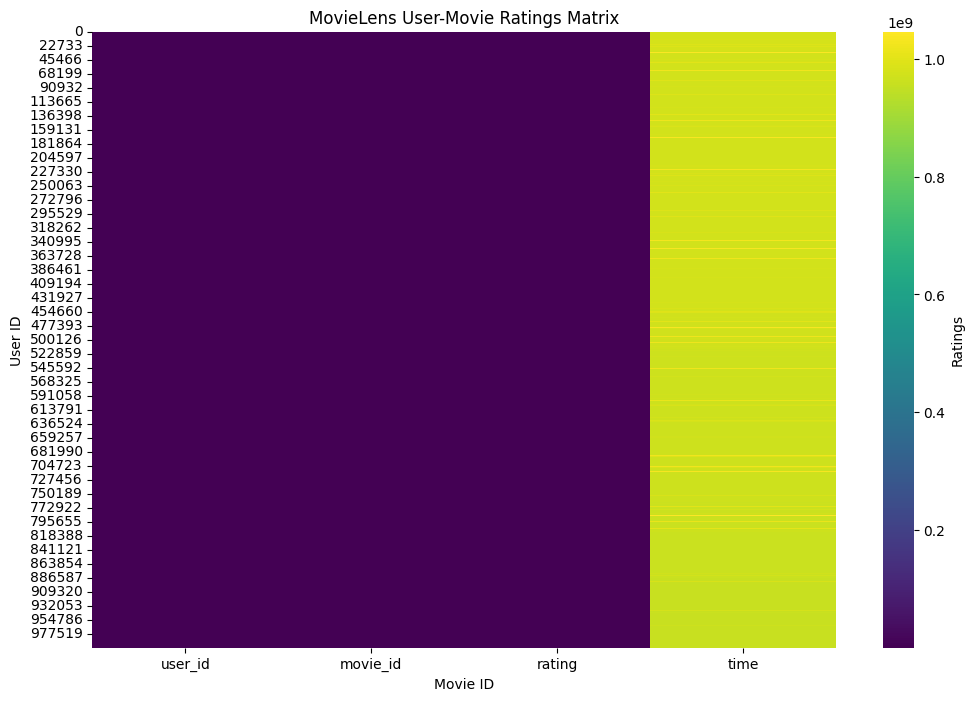

In [7]:
# Plotting some dimensions of the dataset to get a sense of the spread of the ratings.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(ratings, cmap='viridis', cbar_kws={'label': 'Ratings'})
plt.title('MovieLens User-Movie Ratings Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

3. Implement SVD and PCA logic on your own and find the appropriate k-dimensions to represent this data (4)

Compute SVD



In [8]:

# Implement SVD without using any library

def svd(A):
    AT_A = np.dot(A.T, A)

    eigenvalues, eigenvectors = np.linalg.eig(AT_A)

    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    singular_values = np.sqrt(eigenvalues)

    U = np.dot(A, eigenvectors) / singular_values

    V = eigenvectors

    return U, singular_values, V.T

def apply_svd(X, n_components):
    U, S, VT = svd(X)
    reduced_X = np.dot(X, VT.T[:, :n_components])
    return reduced_X

x = apply_svd(Ratings_demeaned, 50)
print(x.shape)
print(x[:5, :5])

(6040, 50)
[[ -8.44+0.j   1.31+0.j   1.7 +0.j  -3.7 +0.j  -4.43+0.j]
 [-16.11+0.j  -1.46+0.j   0.53+0.j   2.06+0.j   9.63+0.j]
 [ -9.48+0.j  -1.92+0.j  -1.66+0.j  -1.12+0.j  -1.99+0.j]
 [ -5.33+0.j  -0.61+0.j  -4.16+0.j   2.78+0.j   0.51+0.j]
 [-13.42+0.j   2.69+0.j  13.04+0.j  10.42+0.j  -4.05+0.j]]


Calculate the PCA of the matrix

In [20]:
#pca

def my_pca(x, n_components):
    x_mean = np.mean(x, axis=0)
    x = x - x_mean
    cov = np.dot(x.T, x)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return np.dot(x, eigenvectors[:, :n_components])

pca = my_pca(Ratings_demeaned, 50)
print(pca.shape)
  

(6040, 50)


Visualize the data (t-sne plot) after applying SVD and PCA (2)

By looking at the 3 plots below (SVD, PCA and t-SNE), we can see that t-SNE is able to separate the data better than SVD and PCA. The t-SNE plot shows that the data is separated into multiple clusters. The SVD and PCA plots show that the data is not separated into clusters.

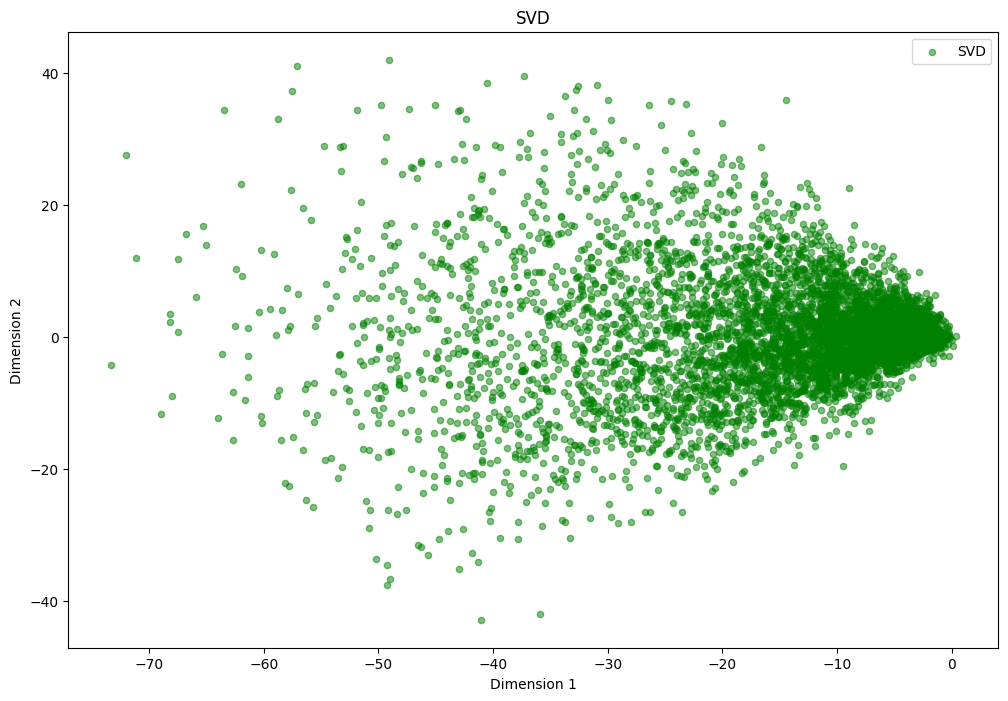

C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


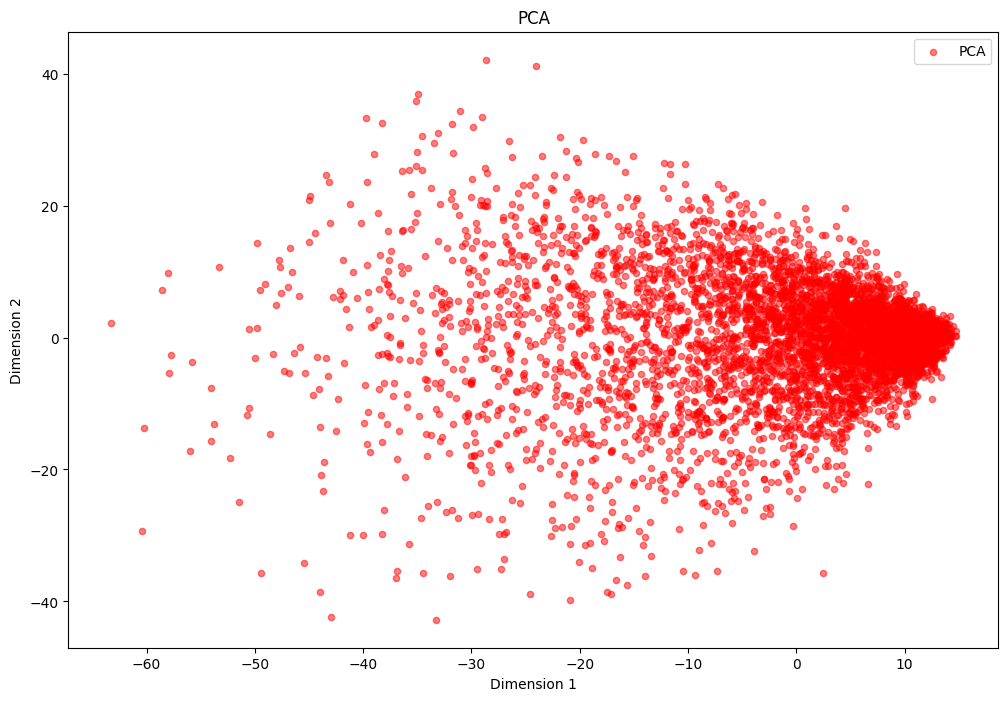

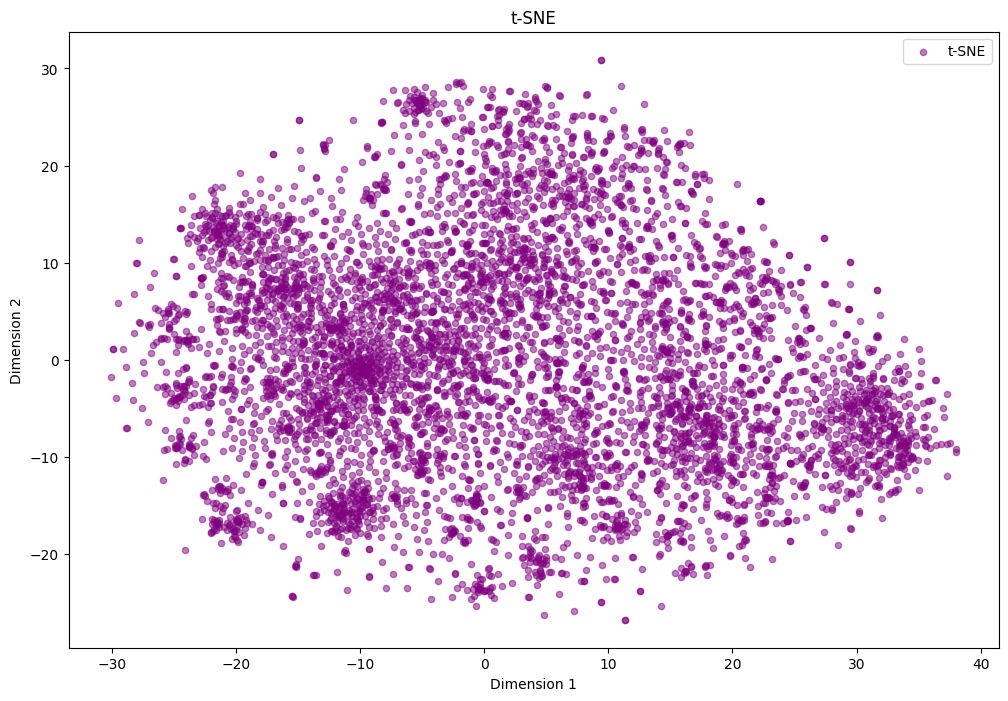

In [42]:
# Visualize the data after applying SVD and PCA (2)
import matplotlib.pyplot as plt

# SVD plot
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c='green', label='SVD', s=20, alpha=0.5)
plt.title('SVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# PCA plot
plt.figure(figsize=(12, 8))
plt.scatter(pca[:, 0], pca[:, 1], c='red', label='PCA', s=20, alpha=0.5)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# t-SNE plot
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(Ratings_demeaned)
plt.figure(figsize=(12, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='purple', label='t-SNE' , s=20, alpha=0.5)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


Applying t-sne on the SVD transformed data, we can see that the data is separated into clusters. This shows that applying t-sne on the SVD transformed data is able to separate the data into clusters better than raw SVD data.

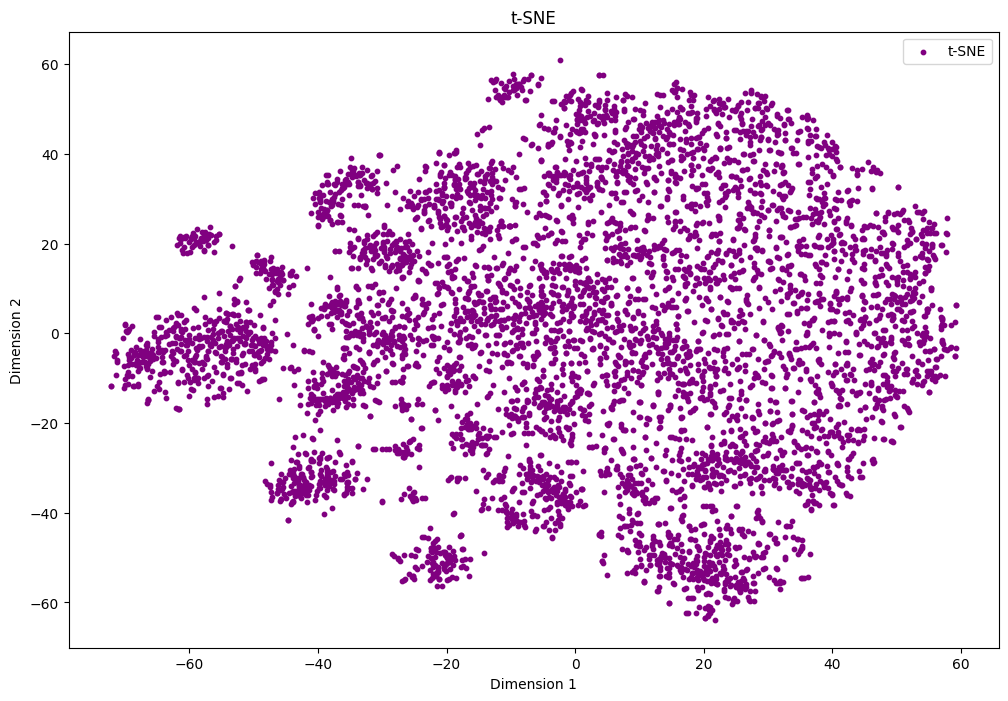

In [43]:
#Visualize the t-snE plot of svd
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(x)
plt.figure(figsize=(12, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1],s=10, c='purple', label='t-SNE')
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Applying t-sne on the PCA transformed data, we can see that the data is separated into clusters. This shows that applying t-sne on the PCA transformed data is able to separate the data into clusters better than raw PCA data. Essentially, we are reducing the dimensionality of the data from 50 to 2 dimensions. This allows us to visualize the data in 2 dimensions.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 6040 samples in 0.003s...
[t-SNE] Computed neighbors for 6040 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6040
[t-SNE] Computed conditional probabilities for sample 2000 / 6040
[t-SNE] Computed conditional probabilities for sample 3000 / 6040
[t-SNE] Computed conditional probabilities for sample 4000 / 6040
[t-SNE] Computed conditional probabilities for sample 5000 / 6040
[t-SNE] Computed conditional probabilities for sample 6000 / 6040
[t-SNE] Computed conditional probabilities for sample 6040 / 6040
[t-SNE] Mean sigma: 3.634285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.565193
[t-SNE] KL divergence after 300 iterations: 3.551663


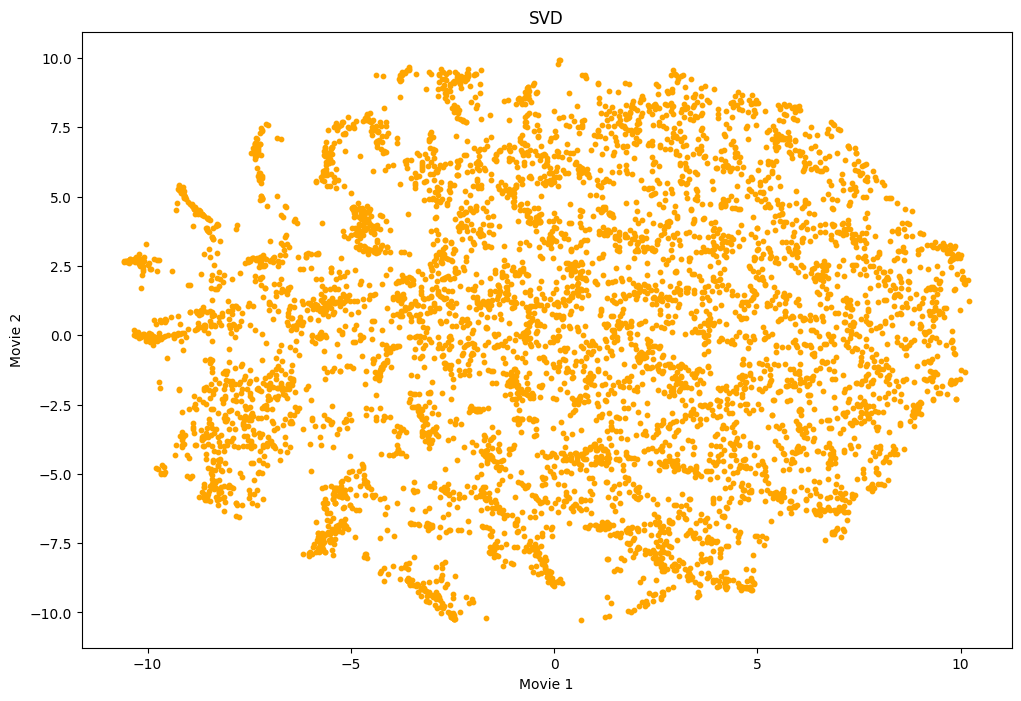

In [44]:
# Visualize the data (t-sne plot) after applying PCA

#convert pca to dataframe
df_pca = pd.DataFrame(pca)

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)

tsne_results = tsne.fit_transform(df_pca.values.real)
plt.figure(figsize=(12,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, color='orange')
plt.xlabel('Movie 1')
plt.ylabel('Movie 2')
plt.title('SVD')
plt.show()

### Inferences and Results

#### SVD

The SVD plot shows that the data is not separated into clusters. The data is scattered all over the plot. This shows that SVD is not able to separate the data into clusters.

#### PCA

The PCA plot shows that the data is not separated into clusters. The data is scattered all over the plot. This shows that PCA is not able to separate the data into clusters.

#### t-SNE

The t-SNE plot shows that the data is separated into clusters. The data is separated into multiple clusters. This shows that t-SNE is able to separate the data into clusters.

#### t-SNE on SVD

Shows better results than just SVD. The data is separated into clusters. This shows that applying t-sne on the SVD transformed data is able to separate the data into clusters better than raw SVD data.

#### t-SNE on PCA

Shows better results than just PCA. The data is separated into clusters. This shows that applying t-sne on the PCA transformed data is able to separate the data into clusters better than raw PCA data.